In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate

# Load

In [2]:
df = pd.read_csv('../Data/heart_2022_no_nans.csv')

# Data inspection

## Visual

In [3]:
# Get continuous variable columns names
cnts_cols = list(df.describe().columns)

# Print summary of those columns
df.describe()

PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       246022.000000     246022.000000  246022.000000   246022.000000   
mean             4.119026          4.167140       7.021331        1.705150   
std              8.405844          8.102687       1.440681        0.106654   
min              0.000000          0.000000       1.000000        0.910000   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          4.000000       8.000000        1.780000   
max             30.000000         30.000000      24.000000        2.410000   

       WeightInKilograms            BMI  
count      246022.000000  246022.000000  
mean           83.615179      28.668136  
std            21.323156       6.513973  
min            28.120000      12.020000  
25%            68.040000      24.270000  
50%            81.650000      27.460000  
75%            95.250000      31.890000  
max           292.570000      97.650000

In [4]:
# Get categorical variable column names
cat_cols = list(df.columns.difference(cnts_cols))

# Visually inspect those columns
df[cat_cols].head()

AgeCategory AlcoholDrinkers BlindOrVisionDifficulty ChestScan CovidPos  \
0     Age 65 to 69              No                      No        No       No   
1     Age 70 to 74              No                      No        No       No   
2     Age 75 to 79             Yes                     Yes       Yes      Yes   
3  Age 80 or older              No                      No        No      Yes   
4  Age 80 or older              No                      No        No       No   

  DeafOrHardOfHearing DifficultyConcentrating DifficultyDressingBathing  \
0                  No                      No                        No   
1                  No                      No                        No   
2                  No                      No                        No   
3                  No                      No                        No   
4                  No                      No                        No   

  DifficultyErrands DifficultyWalking  \
0                No                No   
1                No                No   
2                No               Yes   
3                No               Yes   
4                No                No   

                             ECigaretteUsage FluVaxLast12 GeneralHealth  \
0  Never used e-cigarettes in my entire life          Yes     Very good   
1  Never used e-cigarettes in my entire life          Yes     Very good   
2  Never used e-cigarettes in my entire life           No     Very good   
3  Never used e-cigarettes in my entire life          Yes          Fair   
4  Never used e-cigarettes in my entire life          Yes          Good   

  HIVTesting HadAngina HadArthritis HadAsthma HadCOPD HadDepressiveDisorder  \
0         No        No          Yes        No      No                    No   
1         No        No          Yes        No      No                    No   
2         No        No          Yes        No      No                    No   
3         No        No          Yes        No      No                   Yes   
4         No        No          Yes        No      No                    No   

  HadDiabetes HadHeartAttack HadKidneyDisease HadSkinCancer HadStroke  \
0          No             No               No            No        No   
1         Yes             No               No            No        No   
2          No             No               No            No        No   
3          No             No               No           Yes        No   
4          No             No               No            No        No   

  HighRiskLastYear                                    LastCheckupTime  \
0               No  Within past year (anytime less than 12 months ...   
1               No  Within past year (anytime less than 12 months ...   
2               No  Within past year (anytime less than 12 months ...   
3               No  Within past year (anytime less than 12 months ...   
4               No  Within past year (anytime less than 12 months ...   

  PhysicalActivities PneumoVaxEver     RaceEthnicityCategory  \
0                Yes           Yes  White only, Non-Hispanic   
1                Yes           Yes  White only, Non-Hispanic   
2                 No           Yes  White only, Non-Hispanic   
3                Yes           Yes  White only, Non-Hispanic   
4                Yes           Yes  White only, Non-Hispanic   

             RemovedTeeth     Sex   SmokerStatus    State  \
0            None of them  Female  Former smoker  Alabama   
1            None of them    Male  Former smoker  Alabama   
2  6 or more, but not all    Male  Former smoker  Alabama   
3            None of them  Female   Never smoked  Alabama   
4                  1 to 5  Female   Never smoked  Alabama   

                                   TetanusLast10Tdap  
0                                 Yes, received Tdap  
1  Yes, received tetanus shot but not sure what type  
2  No, did not receive any tetanus shot in the pa...  
3  No, did not receive any tetanus shot in the

In [5]:
# Find columns with "Yes" or "No" values
yes_no_cols = [col for col in df.columns if set(df[col].unique()) == {'Yes', 'No'}]

# Get non-binary categorical columns
multi_cat_cols = list(set(cat_cols) - set(yes_no_cols))

# Print the unique values of all multi-level categorical columns
for col in multi_cat_cols:
    if col != 'State':
        print(f'{col} : {df[col].unique()}\n')

RaceEthnicityCategory : ['White only, Non-Hispanic' 'Black only, Non-Hispanic'
 'Other race only, Non-Hispanic' 'Multiracial, Non-Hispanic' 'Hispanic']

LastCheckupTime : ['Within past year (anytime less than 12 months ago)'
 '5 or more years ago'
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 years (2 years but less than 5 years ago)']

Sex : ['Female' 'Male']

GeneralHealth : ['Very good' 'Fair' 'Good' 'Excellent' 'Poor']

CovidPos : ['No' 'Yes'
 'Tested positive using home test without a health professional']

AgeCategory : ['Age 65 to 69' 'Age 70 to 74' 'Age 75 to 79' 'Age 80 or older'
 'Age 50 to 54' 'Age 40 to 44' 'Age 60 to 64' 'Age 55 to 59'
 'Age 45 to 49' 'Age 35 to 39' 'Age 25 to 29' 'Age 30 to 34'
 'Age 18 to 24']

HadDiabetes : ['No' 'Yes' 'Yes, but only during pregnancy (female)'
 'No, pre-diabetes or borderline diabetes']

TetanusLast10Tdap : ['Yes, received Tdap' 'Yes, received tetanus shot but not sure what type'
 'No, did not receive any tet

### Notes -- multi-level categorical variables

Below are the notes on which transformations to apply to which multi-level categorical variables:
- `Sex`:
  - convert to binary column where Female=0 and Male=1
- `AgeCategory`: 
  - convert to ordinal variable
  - make each step +5 years
  - normalize final column to 0-1 
- `GeneralHealth`:
  - convert to an ordinal variable where Poor=0, Fair=1, Good=2, Very good=3, and Excellent=4
- `RemovedTeeth`:
  - convert to ordinal where 'None of them'=0, '1 to 5'=1, '6 or more, but not all'=2, 'All'=3
  - *Comments:* this imposes an ordered value on the number of teeth a person has had removed
- `State`:
  - convert to regions based on this [Insider region article](https://www.businessinsider.com/united-states-regions-new-england-midwest-south-2018-4#and-west-south-central-includes-the-western-most-states-in-the-south-10): 
    - New_England = Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, and Connecticut
    - Middle_Atlantic = New York, New Jersey, and Pennsylvania
    - East_North_Central = Ohio, Michigan, Indiana, Wisconsin, and Illinois
    - West_North_Central = Minnesota, Iowa, Missouri, North Dakota, South Dakota, Nebraska, and Kansas
    - South_Atlantic = Delaware, Maryland, West Virginia, Virginia, North Carolina, South Carolina, Georgia, Florida, and Washington, DC
    - East_South_Central = Kentucky, Tennessee, Alabama, and Mississippi
    - West_South_Central = Arkansas, Louisiana, Oklahoma, and Texas
    - Mountain_Region = Montana, Idaho, Wyoming, Colorado, New Mexico, Arizona, Utah, and Nevada
    - Pacific_Region = California, Oregon, Washington, Alaska, and Hawaii
  - one-hot encode
  - *Comments:* not sure that the grouping above won't hide interactions or impose biases but I think using a grouping that is based on the census is as good a place as any in the name of reducing our feature dimensions
- `RaceEthnicityCategory`
  - one-hot encode
- `SmokerStatus` + `ECigaretteUsage`: options
  - the number of levels and general meaning of them is the same so we could make a single column out of the two before one-hot encoding
  - make each an individual column of ordinal values
  - one-hot encode each
- Apply [frequency based combining](https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/):
  - `LastCheckupTime`
  - `HadDiabetes`
  - `CovidPos`
  - `TetanusLast10Tdap`




# Transformation

## Binary and Ordinal Categorical Columns

In [6]:
# Convert Yes to 1 and No to 0
df[yes_no_cols] = df[yes_no_cols].replace({'Yes': 1, 'No': 0})

# Convert Female to 0 and Male to 1
df['Sex'] = df['Sex'].replace({'Female': 0, 'Male': 1})

# Convert GeneralHealth to ordinal
df['GeneralHealth'] = df['GeneralHealth'].replace({
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very good': 4,
    'Excellent': 5
})

# Convert RemoveTeeth to ordinal
df['RemovedTeeth'] = df['RemovedTeeth'].replace({
    'None of them': 1,
    '1 to 5': 2,
    '6 or more, but not all': 3,
    'All': 4
})

# Convert AgeCagetory to ordinal
age_range_sorted = list(df['AgeCategory'].sort_values().unique())
age_cardinal = list(range(1, len(age_range_sorted) + 1))
age_cardinal_dict = dict(zip(age_range_sorted, age_cardinal))
df['AgeCategory'] = df['AgeCategory'].replace(age_cardinal_dict)

# Add ordinal columns to cnts_cols
cnts_cols.extend(['GeneralHealth', 'RemovedTeeth', 'AgeCategory'])

## Frequency based combining

In [7]:
freq_based_col = [
    'LastCheckupTime',
    'HadDiabetes',
    'CovidPos',
    'TetanusLast10Tdap',
    'SmokerStatus',
    'ECigaretteUsage'
]
for col in freq_based_col:
    freq_table = df.groupby([col]).size().reset_index(name='Frequency')
    freq_table['FrequencyPercentage'] = round(
        freq_table['Frequency']/sum(freq_table['Frequency'])*100,
        2
    )
    print(tabulate(
        freq_table.sort_values('Frequency', ascending=False), headers='keys', tablefmt='psql'),
        '\n'
    )

+----+---------------------------------------------------------+-------------+-----------------------+
|    | LastCheckupTime                                         |   Frequency |   FrequencyPercentage |
|----+---------------------------------------------------------+-------------+-----------------------|
|  3 | Within past year (anytime less than 12 months ago)      |      198153 |                 80.54 |
|  1 | Within past 2 years (1 year but less than 2 years ago)  |       23227 |                  9.44 |
|  2 | Within past 5 years (2 years but less than 5 years ago) |       13744 |                  5.59 |
|  0 | 5 or more years ago                                     |       10898 |                  4.43 |
+----+---------------------------------------------------------+-------------+-----------------------+ 

+----+-----------------------------------------+-------------+-----------------------+
|    | HadDiabetes                             |   Frequency |   FrequencyPercentage |


### *Notes:* Frequency based combining
- `LastCheckupTime`: combine 'Within past 5 years' and 'Within past 2 years' to 'Over 2 years ago', shorten other level names
- `HadDiabetes`: combine 'No, pre-diabetes or borderline diabetes' and 'Yes, but only during pregnancy (female)' to 'Other'
- `CovidPos` and `TetanusLast10Tdap` remain as is due to evenness of distribution
- `SmokerStatus` and `ECigaretteUsage` remain as is -- *reasoning:* there is a realistic physiological difference between someone who is an occasional smoker and someone who is a habitual user
  - Only if we are having trouble with the model, then combine "some days" and "every day"

In [8]:
# Simplify LastCheckupTime to 3 levels
df['LastCheckupTime'] = df['LastCheckupTime'].replace(
    {
        'Within past year (anytime less than 12 months ago)': 'Within past year',
        'Within past 2 years (1 year but less than 2 years ago)': 'Within past 2 years',
        '5 or more years ago': 'Over 2 years ago',
        'Within past 5 years (2 years but less than 5 years ago)': 'Over 2 years ago'
        }
)

# Convert low frequency levels to Other
df['HadDiabetes'] = df['HadDiabetes'].replace(
    {
        'Yes, but only during pregnancy (female)': 'Other', 
        'No, pre-diabetes or borderline diabetes': 'Other'
        }
)

# Shorten wording of CovidPos
df['CovidPos'] = df['CovidPos'].replace(
    {
        'Tested positive using home test without a health professional': 'Home test',
        }
)

# Shorten wording of TetanusLast10Tdap
df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].replace(
    {
        'No, did not receive any tetanus shot in the past 10 years': 'No',
        'Yes, received tetanus shot but not sure what type': 'Yes-type unknown',
        'Yes, received Tdap': 'Yes-Tdap',
        'Yes, received tetanus shot, but not Tdap': 'Yes-not Tdap'
    }
)

for col in freq_based_col:
    print(f'{col} : {df[col].unique()}\n')

LastCheckupTime : ['Within past year' 'Over 2 years ago' 'Within past 2 years']

HadDiabetes : ['No' 'Yes' 'Other']

CovidPos : ['No' 'Yes' 'Home test']

TetanusLast10Tdap : ['Yes-Tdap' 'Yes-type unknown' 'No' 'Yes-not Tdap']

SmokerStatus : ['Former smoker' 'Never smoked' 'Current smoker - now smokes every day'
 'Current smoker - now smokes some days']

ECigaretteUsage : ['Never used e-cigarettes in my entire life' 'Use them some days'
 'Not at all (right now)' 'Use them every day']



## State mapping

In [9]:
# State
state_to_region = {
    'Maine': 'New_England',
    'New Hampshire': 'New_England',
    'Vermont': 'New_England',
    'Massachusetts': 'New_England',
    'Rhode Island': 'New_England',
    'Connecticut': 'New_England',
    'New York': 'Middle_Atlantic',
    'New Jersey': 'Middle_Atlantic',
    'Pennsylvania': 'Middle_Atlantic',
    'Ohio': 'East_North_Central',
    'Michigan': 'East_North_Central',
    'Indiana': 'East_North_Central',
    'Wisconsin': 'East_North_Central',
    'Illinois': 'East_North_Central',
    'Minnesota': 'West_North_Central',
    'Iowa': 'West_North_Central',
    'Missouri': 'West_North_Central',
    'North Dakota': 'West_North_Central',
    'South Dakota': 'West_North_Central',
    'Nebraska': 'West_North_Central',
    'Kansas': 'West_North_Central',
    'Delaware': 'South_Atlantic',
    'Maryland': 'South_Atlantic',
    'West Virginia': 'South_Atlantic',
    'Virginia': 'South_Atlantic',
    'North Carolina': 'South_Atlantic',
    'South Carolina': 'South_Atlantic',
    'Georgia': 'South_Atlantic',
    'Florida': 'South_Atlantic',
    'Washington, DC': 'South_Atlantic',
    'District of Columbia': 'South_Atlantic',
    'Kentucky': 'East_South_Central',
    'Tennessee': 'East_South_Central',
    'Alabama': 'East_South_Central',
    'Mississippi': 'East_South_Central',
    'Arkansas': 'West_South_Central',
    'Louisiana': 'West_South_Central',
    'Oklahoma': 'West_South_Central',
    'Texas': 'West_South_Central',
    'Montana': 'Mountain_Region',
    'Idaho': 'Mountain_Region',
    'Wyoming': 'Mountain_Region',
    'Colorado': 'Mountain_Region',
    'New Mexico': 'Mountain_Region',
    'Arizona': 'Mountain_Region',
    'Utah': 'Mountain_Region',
    'Nevada': 'Mountain_Region',
    'California': 'Pacific_Region',
    'Oregon': 'Pacific_Region',
    'Washington': 'Pacific_Region',
    'Alaska': 'Pacific_Region',
    'Hawaii': 'Pacific_Region',
    'Virgin Islands': 'Territories',
    'Puerto Rico': 'Territories',
    'Guam': 'Territories'
}
df['Region'] = df['State'].map(state_to_region)

print(f"Region : {df['Region'].unique()}\n")

Region : ['East_South_Central' 'Pacific_Region' 'Mountain_Region'
 'West_South_Central' 'New_England' 'South_Atlantic' 'East_North_Central'
 'West_North_Central' 'Middle_Atlantic' 'Territories']



## Smoking and E-cigs
**Options:**
- Make each of these an ordinal feature and keep them separate
- Combine these to a single ordinal feature of smoked/vaped where the levels are 1, 2, 3, 4 and if you both smoked and vaped then you get the max of the 2 original ordinal features
- Keep them separate and one-hot encode the categories
- Make it so that the levels are equivalent and one-hot encode such that, for example, "Not at all (right now)" for ecig = "Former smoker" which becomes a final column of "Former smoker/vaper" 0 or 1 dummy variable and repeat similar for all the categories

In [10]:
# Shorten wording of SmokerStatus
df['SmokerStatus'] = df['SmokerStatus'].replace(
    {
        'Never smoked': 'Never',
        'Former smoker': 'Former',
        'Current smoker - now smokes some days': 'Some days',
        'Current smoker - now smokes every day': 'Every day'
    }
)

# Shorten wording of ECigaretteUsage
df['ECigaretteUsage'] = df['ECigaretteUsage'].replace(
    {
        'Never used e-cigarettes in my entire life': 'Never',
        'Not at all (right now)': 'Former',
        'Use them some days': 'Some days',
        'Use them every day': 'Every day'
    }
)

# Convert SmokerStatus to ordinal
df['SmokerStatus_ord'] = df['SmokerStatus'].replace(
    {
        'Never': 1,
        'Former': 2,
        'Some days': 3,
        'Every day': 4
    }
)

# Convert ECigaretteUsage to ordinal
df['ECigaretteUsage_ord'] = df['ECigaretteUsage'].replace(
    {
        'Never': 1,
        'Former': 2,
        'Some days': 3,
        'Every day': 4
    }
)

# Combine SmokerStatus and ECigaretteUsage
df['SmokerOrECig_ord'] = df[
    ['SmokerStatus_ord', 'ECigaretteUsage_ord']
].max(axis=1) 

# Map SmokerOrECig_ord to SmokerOrECig
df['SmokerOrECig'] = df['SmokerOrECig_ord'].replace(
    {
        1: 'Never',
        2: 'Former',
        3: 'Some days',
        4: 'Every day'
    }
)

# Add ordinal to cnts_cols
cnts_cols.extend(['SmokerStatus_ord', 'ECigaretteUsage_ord', 'SmokerOrECig_ord'])

## Min-Max Scaler

In [11]:
scale_cnts_cols = list(map(lambda x: x + '_scaled', cnts_cols))

# Scale numerical columns
scaler = MinMaxScaler()
df[scale_cnts_cols] = scaler.fit_transform(df[cnts_cols])

In [12]:
df[scale_cnts_cols].describe()

PhysicalHealthDays_scaled  MentalHealthDays_scaled  SleepHours_scaled  \
count              246022.000000            246022.000000      246022.000000   
mean                    0.137301                 0.138905           0.261797   
std                     0.280195                 0.270090           0.062638   
min                     0.000000                 0.000000           0.000000   
25%                     0.000000                 0.000000           0.217391   
50%                     0.000000                 0.000000           0.260870   
75%                     0.100000                 0.133333           0.304348   
max                     1.000000                 1.000000           1.000000   

       HeightInMeters_scaled  WeightInKilograms_scaled     BMI_scaled  \
count          246022.000000             246022.000000  246022.000000   
mean                0.530100                  0.209851       0.194419   
std                 0.071103                  0.080632       0.076071   
min                 0.000000                  0.000000       0.000000   
25%                 0.480000                  0.150955       0.143057   
50%                 0.526667                  0.202420       0.180311   
75%                 0.580000                  0.253848       0.232045   
max                 1.000000                  1.000000       1.000000   

       GeneralHealth_scaled  RemovedTeeth_scaled  AgeCategory_scaled  \
count         246022.000000        246022.000000       246022.000000   
mean               0.622479             0.227535            0.559841   
std                0.258202             0.291287            0.288794   
min                0.000000             0.000000            0.000000   
25%                0.500000             0.000000            0.333333   
50%                0.750000             0.000000            0.583333   
75%                0.750000             0.333333            0.833333   
max                1.000000             1.000000            1.000000   

       SmokerStatus_ord_scaled  ECigaretteUsage_ord_scaled  \
count            246022.000000               246022.000000   
mean                  0.202830                    0.100888   
std                   0.304100                    0.213546   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.333333                    0.000000   
max                   1.000000                    1.000000   

       SmokerOrECig_ord_scaled  
count            246022.000000  
mean                  0.250173  
std                   0.322868  
min                   0.000000  
25%                   0.000000  
50%                   0.000000  
75%                   0.333333  
max                   1.000000

## Investigate transformation results

In [13]:
print(f'Continuous variables:')
for c in cnts_cols:
    print(f'\t{c}')

num_cols = df.describe().columns
cat_cols = df.columns.difference(num_cols)

for c in list(cat_cols):
    print(f'\n{c} : {df[c].unique()}')

Continuous variables:
	PhysicalHealthDays
	MentalHealthDays
	SleepHours
	HeightInMeters
	WeightInKilograms
	BMI
	GeneralHealth
	RemovedTeeth
	AgeCategory
	SmokerStatus_ord
	ECigaretteUsage_ord
	SmokerOrECig_ord

CovidPos : ['No' 'Yes' 'Home test']

ECigaretteUsage : ['Never' 'Some days' 'Former' 'Every day']

HadDiabetes : ['No' 'Yes' 'Other']

LastCheckupTime : ['Within past year' 'Over 2 years ago' 'Within past 2 years']

RaceEthnicityCategory : ['White only, Non-Hispanic' 'Black only, Non-Hispanic'
 'Other race only, Non-Hispanic' 'Multiracial, Non-Hispanic' 'Hispanic']

Region : ['East_South_Central' 'Pacific_Region' 'Mountain_Region'
 'West_South_Central' 'New_England' 'South_Atlantic' 'East_North_Central'
 'West_North_Central' 'Middle_Atlantic' 'Territories']

SmokerOrECig : ['Former' 'Never' 'Every day' 'Some days']

SmokerStatus : ['Former' 'Never' 'Every day' 'Some days']

State : ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Distr

In [14]:
df[cnts_cols].describe()

PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       246022.000000     246022.000000  246022.000000   246022.000000   
mean             4.119026          4.167140       7.021331        1.705150   
std              8.405844          8.102687       1.440681        0.106654   
min              0.000000          0.000000       1.000000        0.910000   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          4.000000       8.000000        1.780000   
max             30.000000         30.000000      24.000000        2.410000   

       WeightInKilograms            BMI  GeneralHealth   RemovedTeeth  \
count      246022.000000  246022.000000  246022.000000  246022.000000   
mean           83.615179      28.668136       3.489916       1.682606   
std            21.323156       6.513973       1.032808       0.873861   
min            28.120000      12.020000       1.000000       1.000000   
25%            68.040000      24.270000       3.000000       1.000000   
50%            81.650000      27.460000       4.000000       1.000000   
75%            95.250000      31.890000       4.000000       2.000000   
max           292.570000      97.650000       5.000000       4.000000   

         AgeCategory  SmokerStatus_ord  ECigaretteUsage_ord  SmokerOrECig_ord  
count  246022.000000     246022.000000        246022.000000     246022.000000  
mean        7.718086          1.608490             1.302664          1.750518  
std         3.465526          0.912301             0.640637          0.968604  
min         1.000000          1.000000             1.000000          1.000000  
25%         5.000000          1.000000             1.000000          1.000000  
50%         8.000000          1.000000             1.000000          1.000000  
75%        11.000000          2.000000             1.000000          2.000000  
max        13.000000          4.000000             4.000000          4.000000

In [15]:
# Save pre-one-hot-encoded data
df.to_csv('../Data/heart_2022_clean.csv', index=False)

# Investigate Data Quality

In [16]:
# If df does not exist, read from csv
if 'df' not in locals():
    clean_df = pd.read_csv('../Data/heart_2022_clean.csv')
else:
    clean_df = df.copy()

In [17]:
# Define list of continuous variables
if 'cnts_cols' not in locals():
    cnts_cols = [
        'PhysicalHealthDays',
        'MentalHealthDays',
        'SleepHours',
        'HeightInMeters',
        'WeightInKilograms',
        'BMI',
        'GeneralHealth',
        'RemovedTeeth',
        'AgeCategory',
        'SmokerStatus_ord',
        'ECigaretteUsage_ord',
        'SmokerOrECig_ord'
    ]

## Continuous variables

### Distribution Histogram

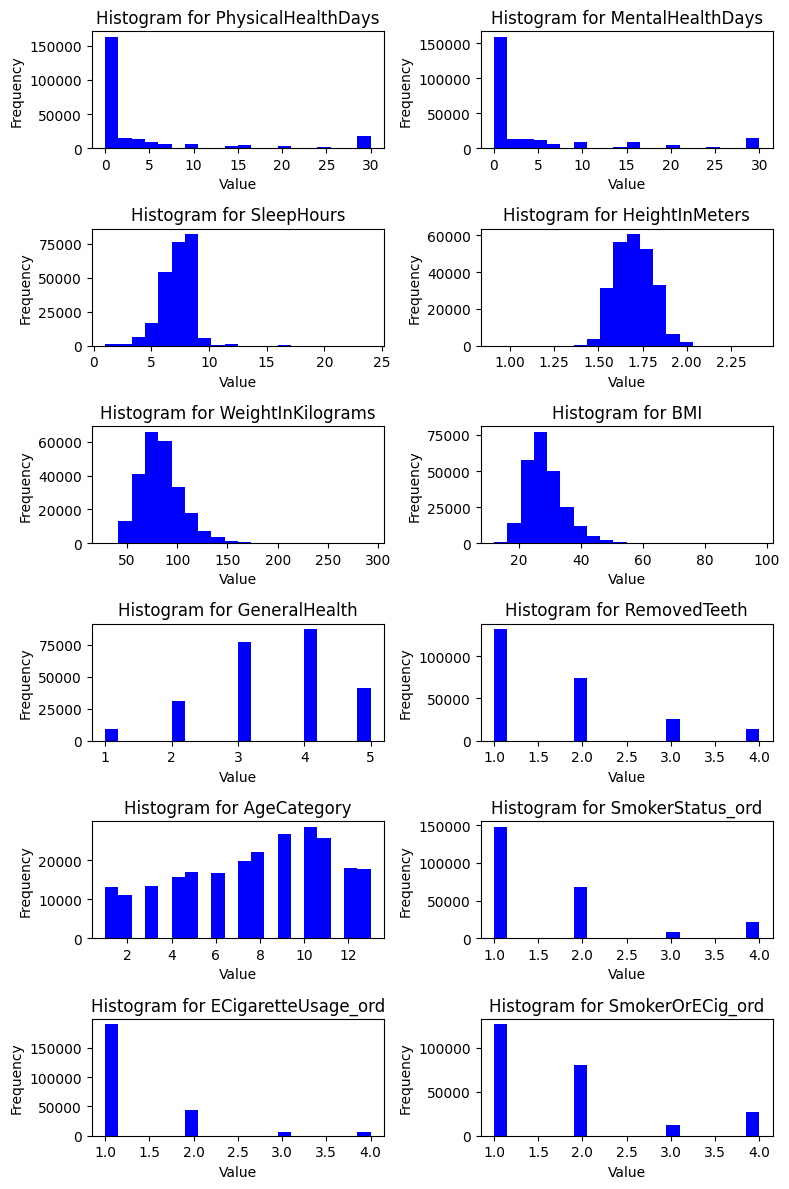

In [18]:
# Create histogram of continuous variables
fig, ax = plt.subplots(len(cnts_cols)//2, 2, figsize=(8, 12))

for i, var in enumerate(cnts_cols):
    row = i // 2
    col = i % 2
    ax[row][col].hist(clean_df[var], bins=20, color = 'blue')
    ax[row][col].set_title(f'Histogram for {var}')
    ax[row][col].set_xlabel('Value')
    ax[row][col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Linearity QQ plots

#### Raw data

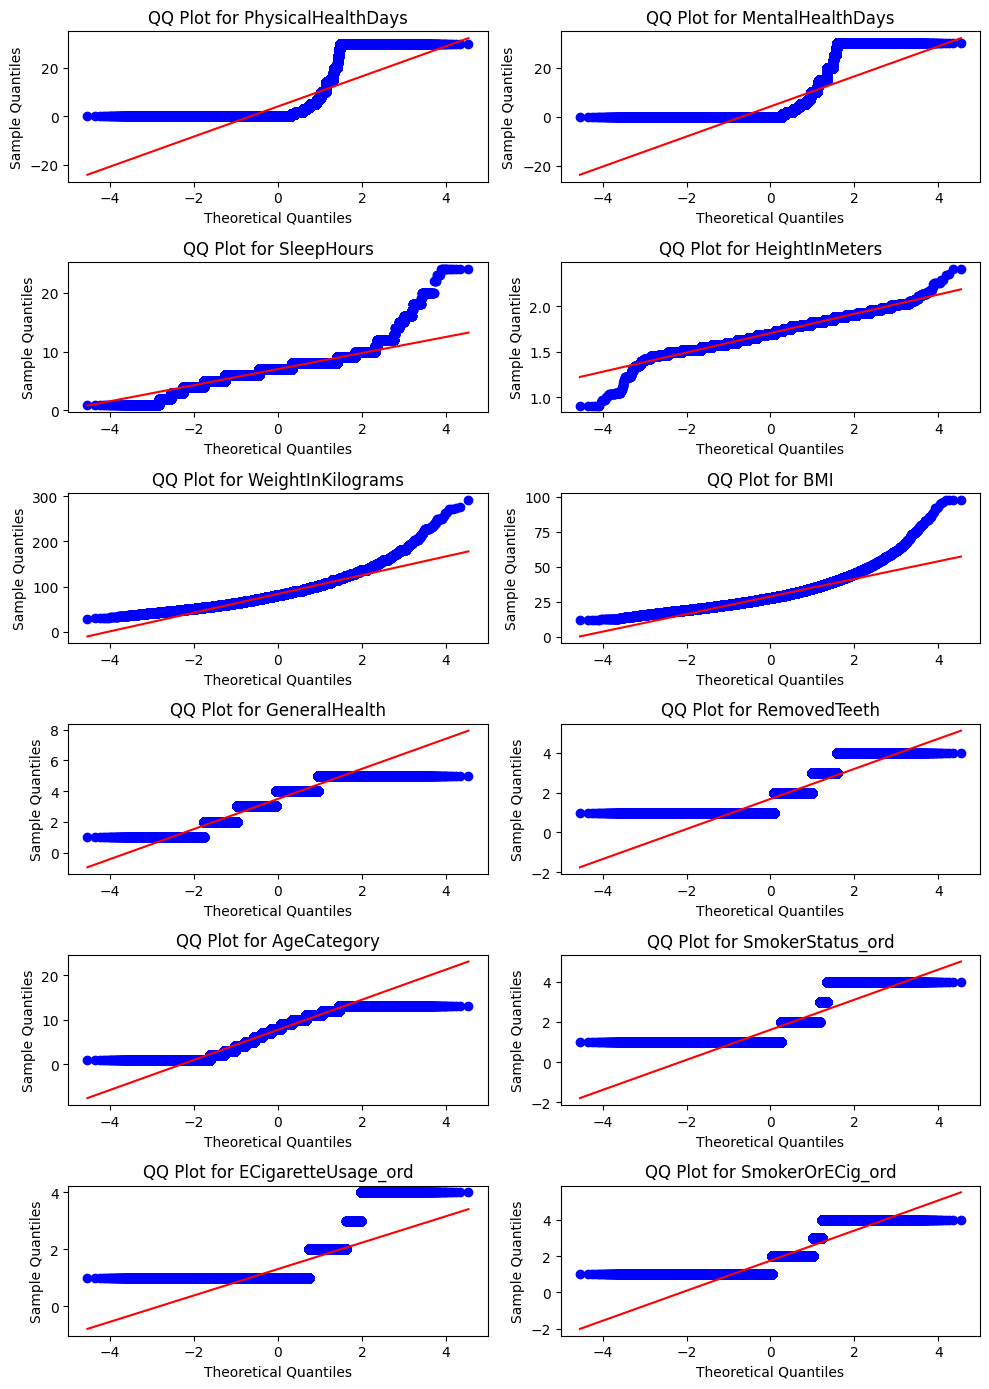

In [19]:
# Create QQ plots for continuous variables 

fig, ax = plt.subplots(len(cnts_cols)//2, 2, figsize=(10, 14))

for i, var in enumerate(cnts_cols):
    row = i // 2
    col = i % 2
    stats.probplot(clean_df[var], plot=ax[row][col])
    ax[row][col].set_title(f'QQ Plot for {var}')
    ax[row][col].set_xlabel('Theoretical Quantiles')
    ax[row][col].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

### Box plots -- Outliers

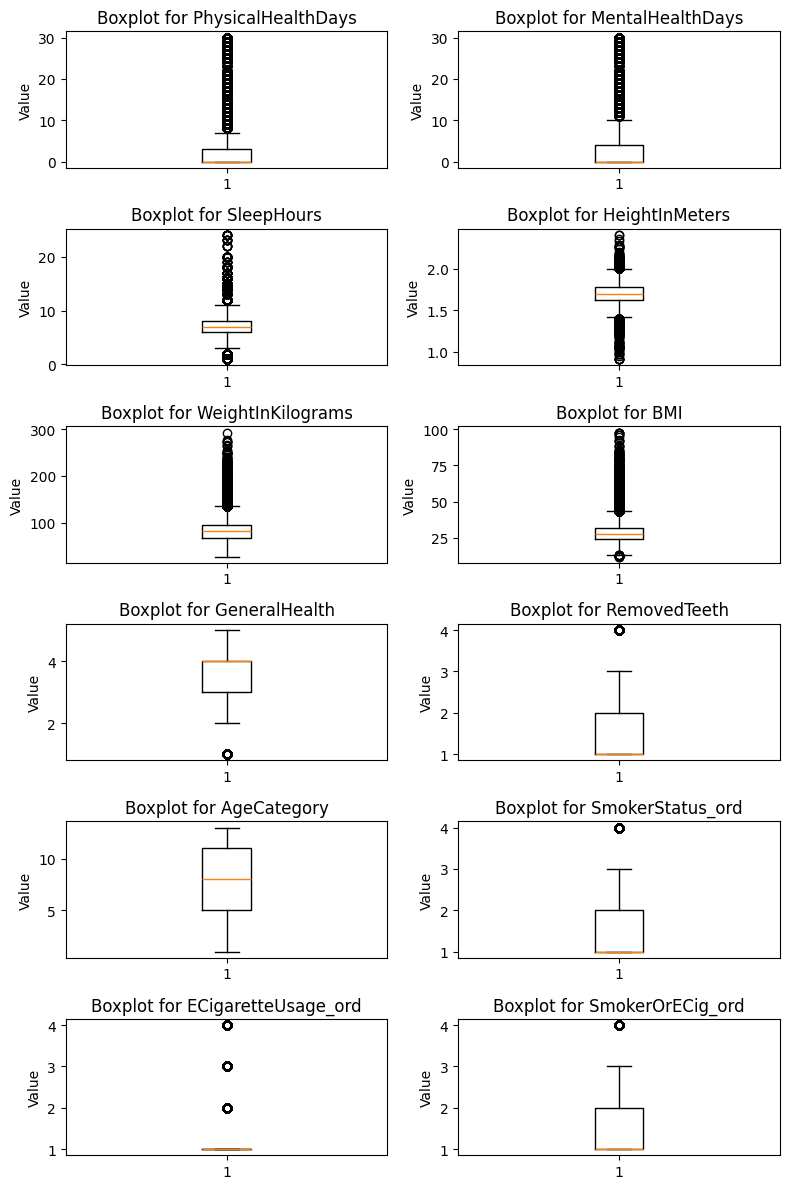

IQR for each continuous variable:
PhysicalHealthDays has 38810 outliers:
MentalHealthDays has 32714 outliers:
SleepHours has 3488 outliers:
HeightInMeters has 830 outliers:
WeightInKilograms has 5940 outliers:
BMI has 7563 outliers:
GeneralHealth has 9430 outliers:
RemovedTeeth has 13778 outliers:
AgeCategory has no outliers.
SmokerStatus_ord has 21659 outliers:
ECigaretteUsage_ord has 55894 outliers:
SmokerOrECig_ord has 26892 outliers:


In [20]:
# Create boxplots for each cont. variable

fig, ax = plt.subplots(len(cnts_cols)//2, 2, figsize=(8, 12))

for i, var in enumerate(cnts_cols):
    row = i // 2
    col = i % 2
    ax[row][col].boxplot(clean_df[var])
    ax[row][col].set_title(f'Boxplot for {var}')
    ax[row][col].set_ylabel('Value')

plt.tight_layout()
plt.show()

# Calculate the IQR for each variable
print('IQR for each continuous variable:')
for var in cnts_cols:
    q1 = clean_df[var].quantile(0.25)
    q3 = clean_df[var].quantile(0.75)
    iqr = q3 - q1
    
    # Define the upper and lower bounds for outliers
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    # Find the outliers in the variable
    outliers = clean_df[(clean_df[var] < lower_bound) | (clean_df[var] > upper_bound)]
    
    # Print the number of outliers and their values
    if len(outliers) > 0:
        print(f'{var} has {len(outliers)} outliers:')
    else:
        print(f'{var} has no outliers.')

### Heteroscedasticity

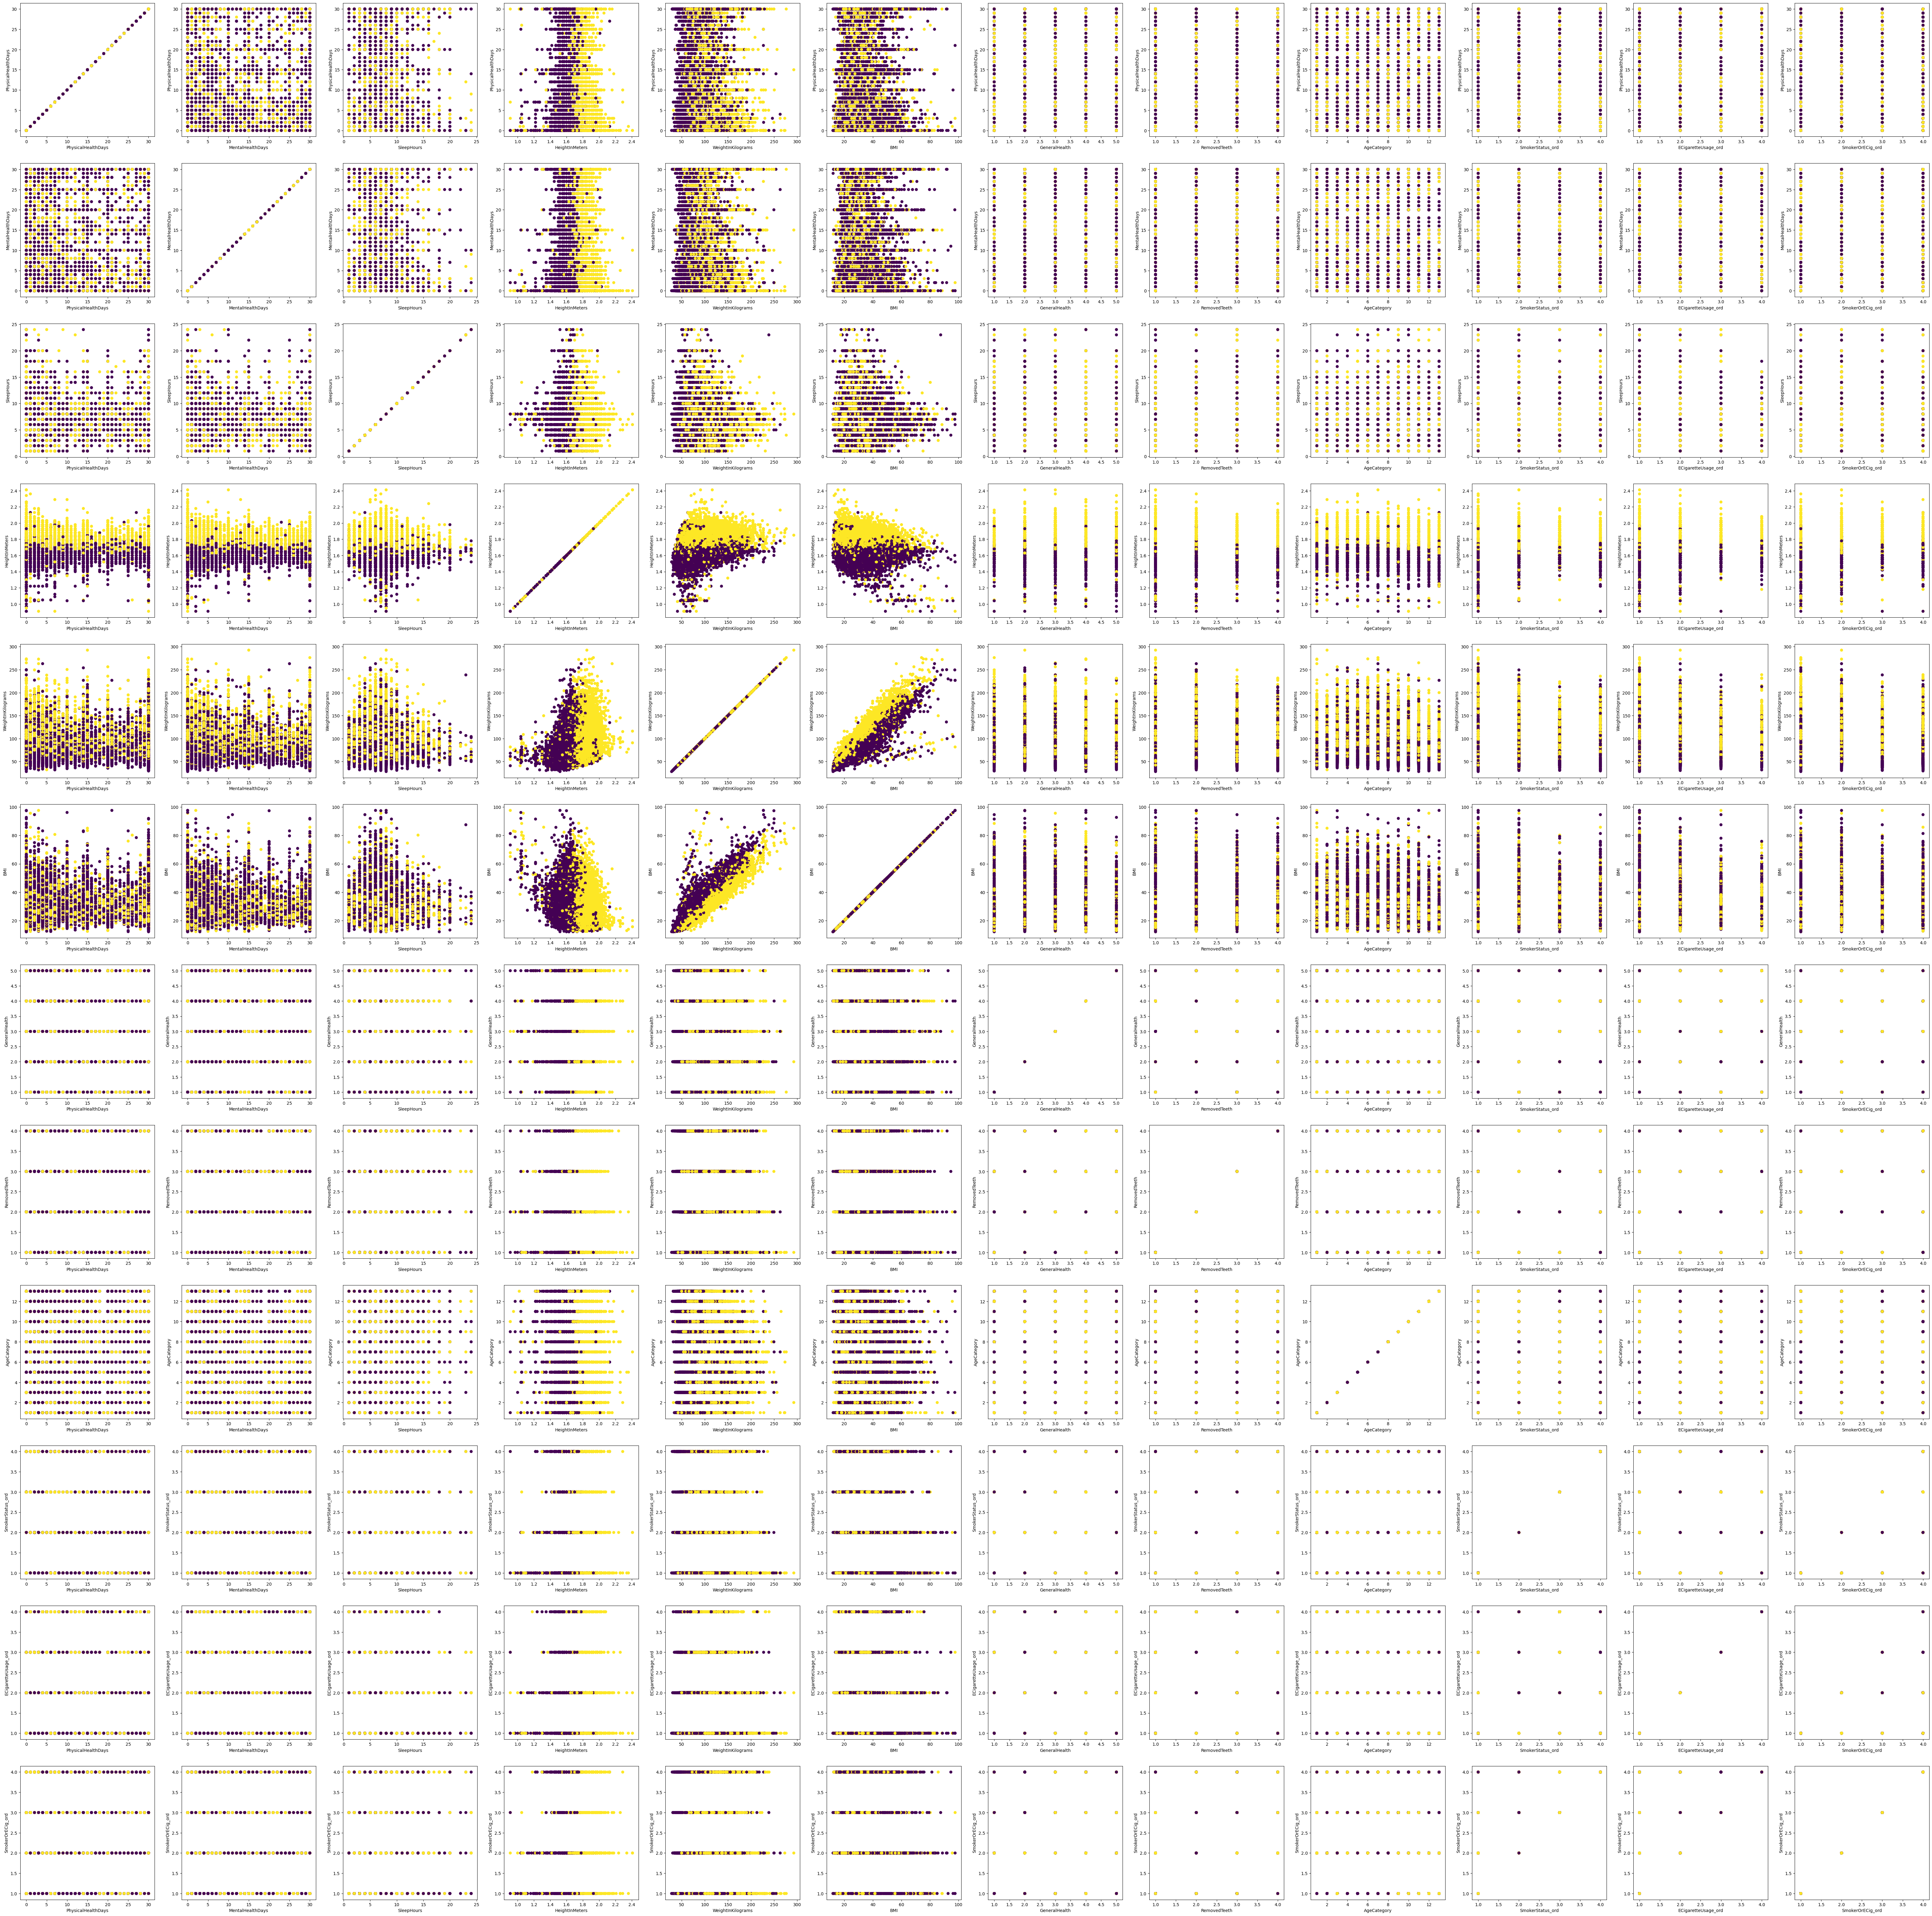

In [ ]:
PLOTS_PER_ROW = len(cnts_cols)

# Create scatterplots
figure, axis = plt.subplots(PLOTS_PER_ROW, PLOTS_PER_ROW, sharex=False, figsize=(80,80))

# colormapping based on Sex
cs = 60*(clean_df['Sex'] + 0.25)

i, j = 0, 0
# create a scatterplot for all continuous variables
for continous_var in cnts_cols*PLOTS_PER_ROW:
  axis[j, i].scatter(x=clean_df[cnts_cols[i]], y=clean_df[continous_var], c=cs, cmap='viridis')
  axis[j, i].set_xlabel(cnts_cols[i])
  axis[j, i].set_ylabel(continous_var)
  j+=1
  if j%PLOTS_PER_ROW==0:
      i+=1
      j=0

plt.legend([],[], frameon=False)
plt.show()

# sns.pairplot(data=clean_df, hue="Sex")

### Correlation heat map

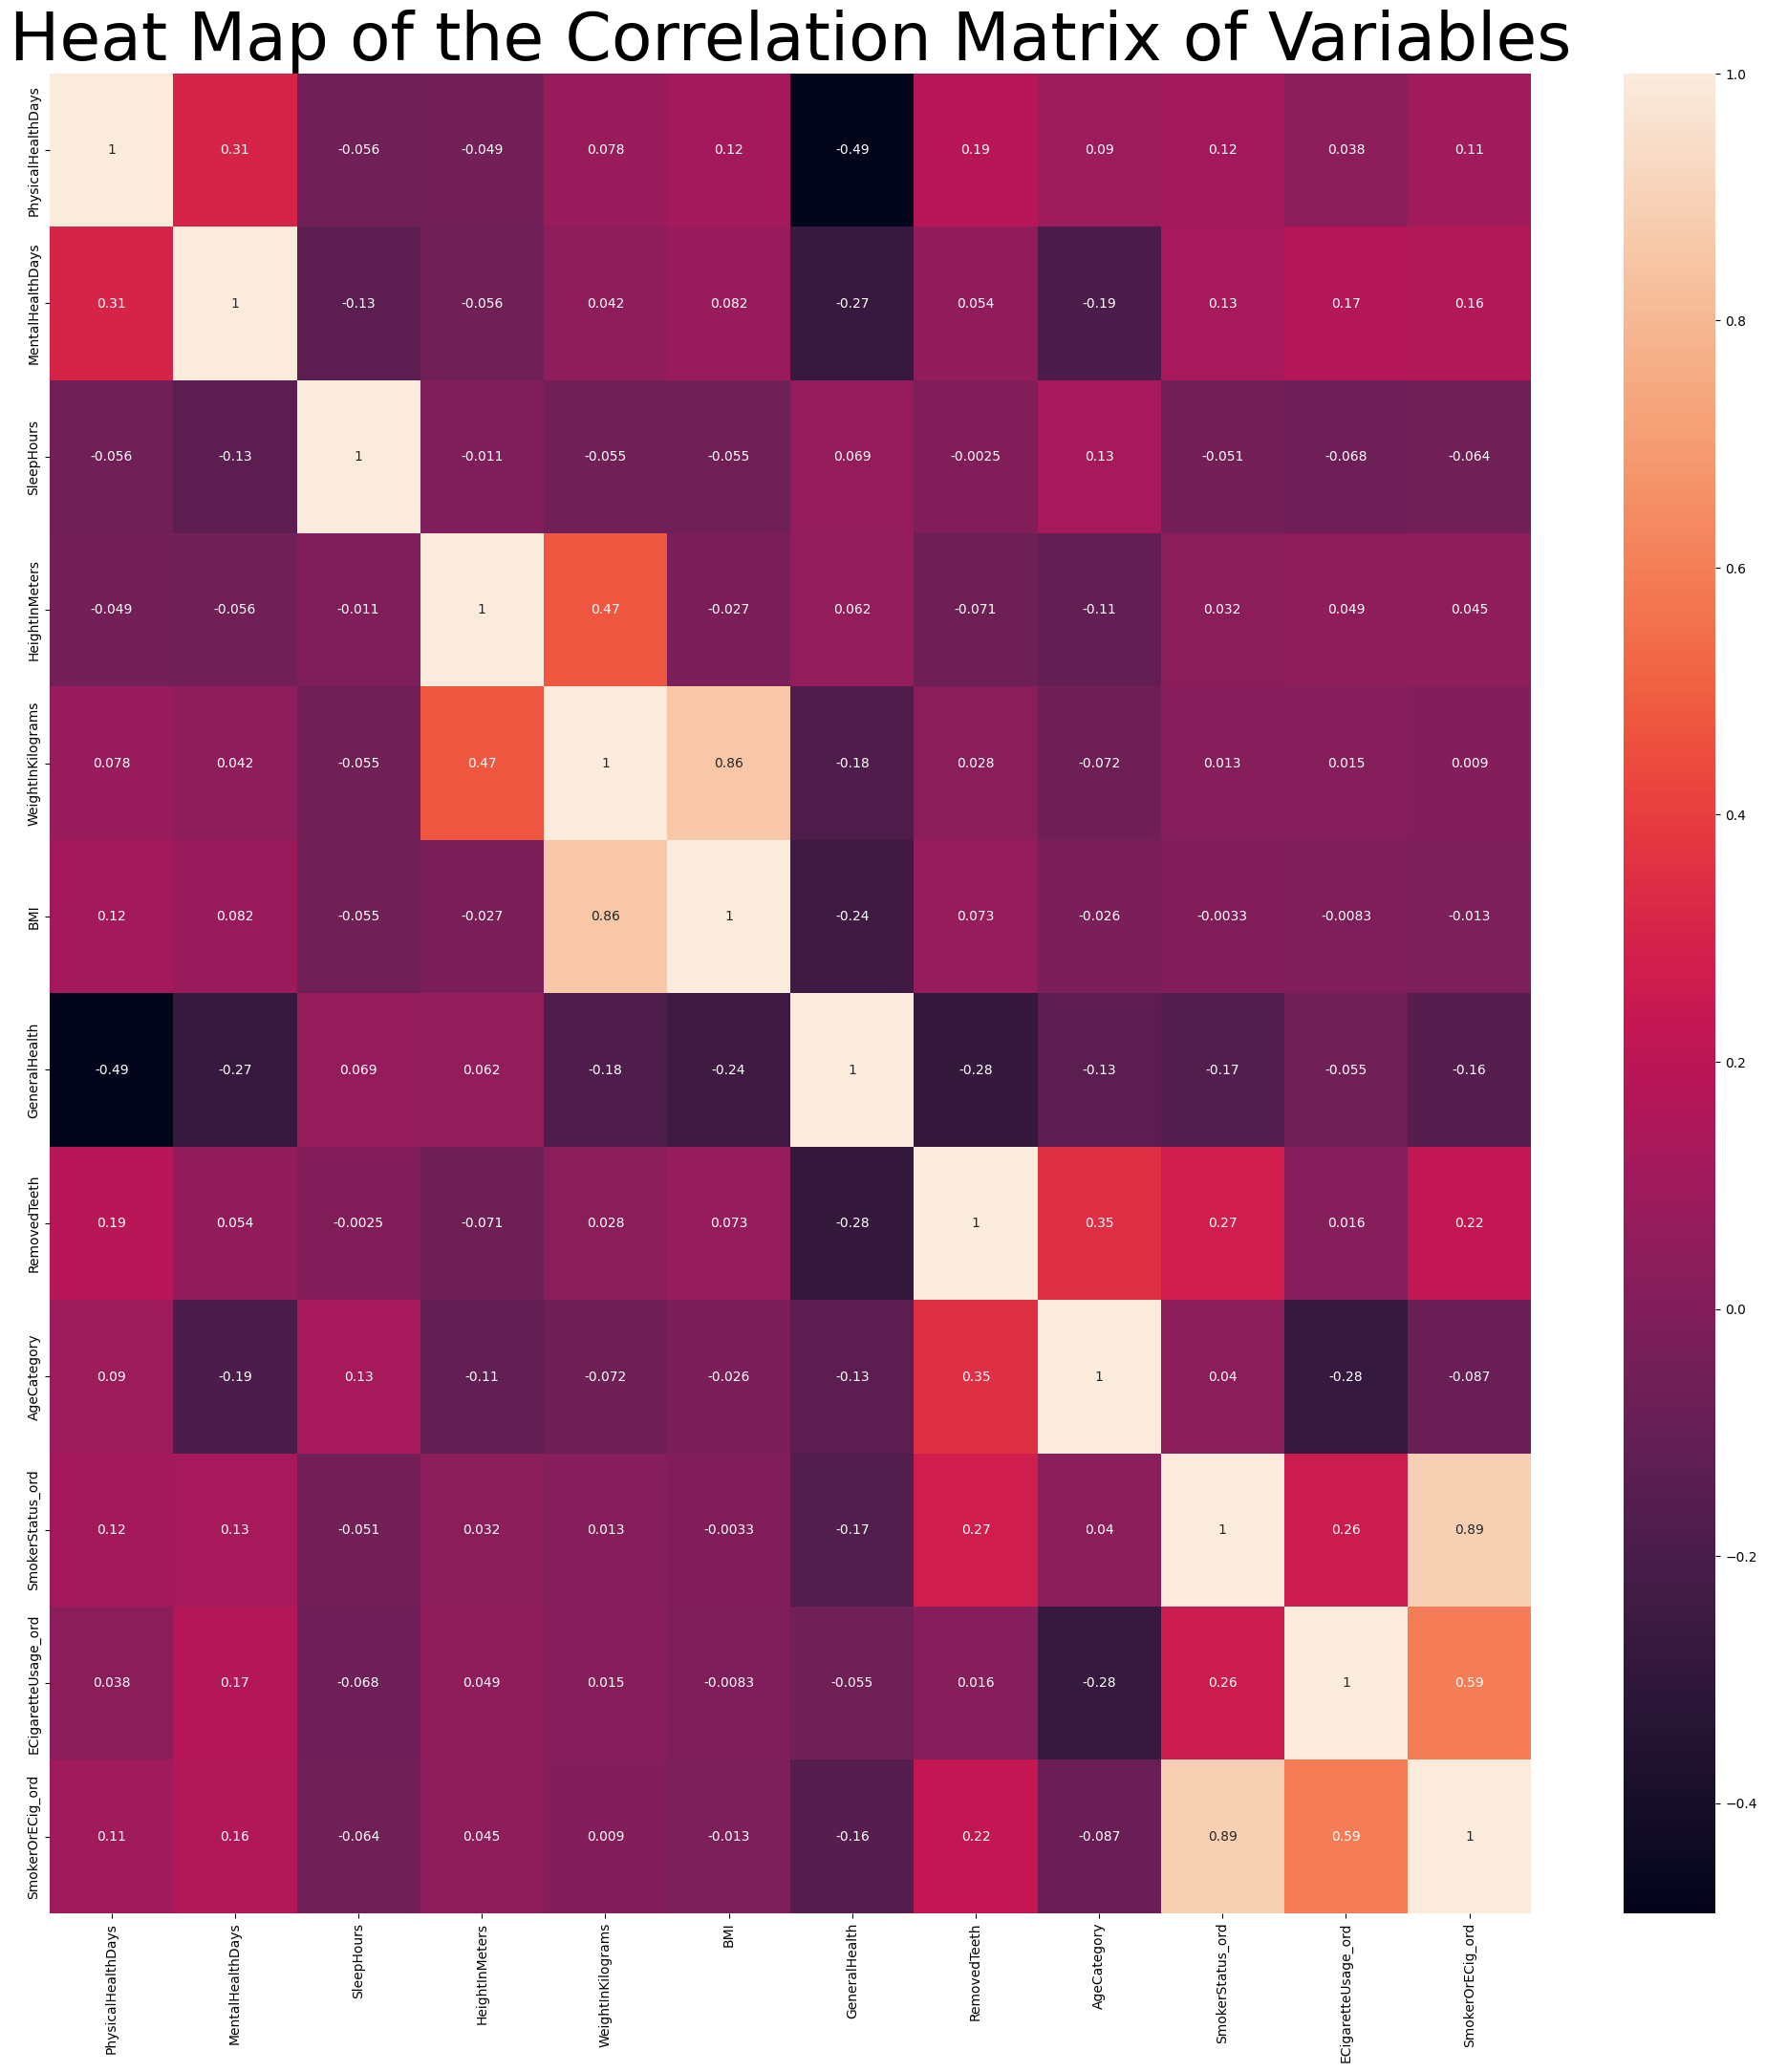

In [ ]:
# Correlation matrix

corr_mat = clean_df[cnts_cols].corr()
# print(corr_mat)

fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(corr_mat, annot=True)
plt.title("Heat Map of the Correlation Matrix of Variables", fontsize = 50)
plt.show()

In [5]:
# Continuous variables post-correlation matrix inspection
cnts_cols = [
        'PhysicalHealthDays',
        'MentalHealthDays',
        'SleepHours',
        'HeightInMeters',
        # 'WeightInKilograms',      # removed after inspecting correlation matrix
        'BMI',
        'GeneralHealth',
        'RemovedTeeth',
        'AgeCategory',
        'SmokerStatus_ord',
        'ECigaretteUsage_ord',
        # 'SmokerOrECig_ord'        # removed after inspecting correlation matrix
    ]
cnts_cols       # down to 10 continuous variables

['PhysicalHealthDays',
 'MentalHealthDays',
 'SleepHours',
 'HeightInMeters',
 'BMI',
 'GeneralHealth',
 'RemovedTeeth',
 'AgeCategory',
 'SmokerStatus_ord',
 'ECigaretteUsage_ord']

In [6]:
# Categorical variables
# remove all variations of continuous variables and of original categorical variables
cat_cols = list(clean_df.columns.difference(cnts_cols + ['WeightInKilograms', 'SmokerOrECig_ord', 'SmokerOrECig', 'SmokerStatus', 'ECigaretteUsage', 'State']))

for y in cnts_cols:
    cat_cols = [x for x in cat_cols if y not in x and "_scaled" not in x and "_ord" not in x]

cat_cols        # down to 29 categorical variables

['AlcoholDrinkers',
 'BlindOrVisionDifficulty',
 'ChestScan',
 'CovidPos',
 'DeafOrHardOfHearing',
 'DifficultyConcentrating',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'DifficultyWalking',
 'FluVaxLast12',
 'HIVTesting',
 'HadAngina',
 'HadArthritis',
 'HadAsthma',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadDiabetes',
 'HadHeartAttack',
 'HadKidneyDisease',
 'HadSkinCancer',
 'HadStroke',
 'HighRiskLastYear',
 'LastCheckupTime',
 'PhysicalActivities',
 'PneumoVaxEver',
 'RaceEthnicityCategory',
 'Region',
 'Sex',
 'TetanusLast10Tdap']

## Categorical variables

### Category distributions

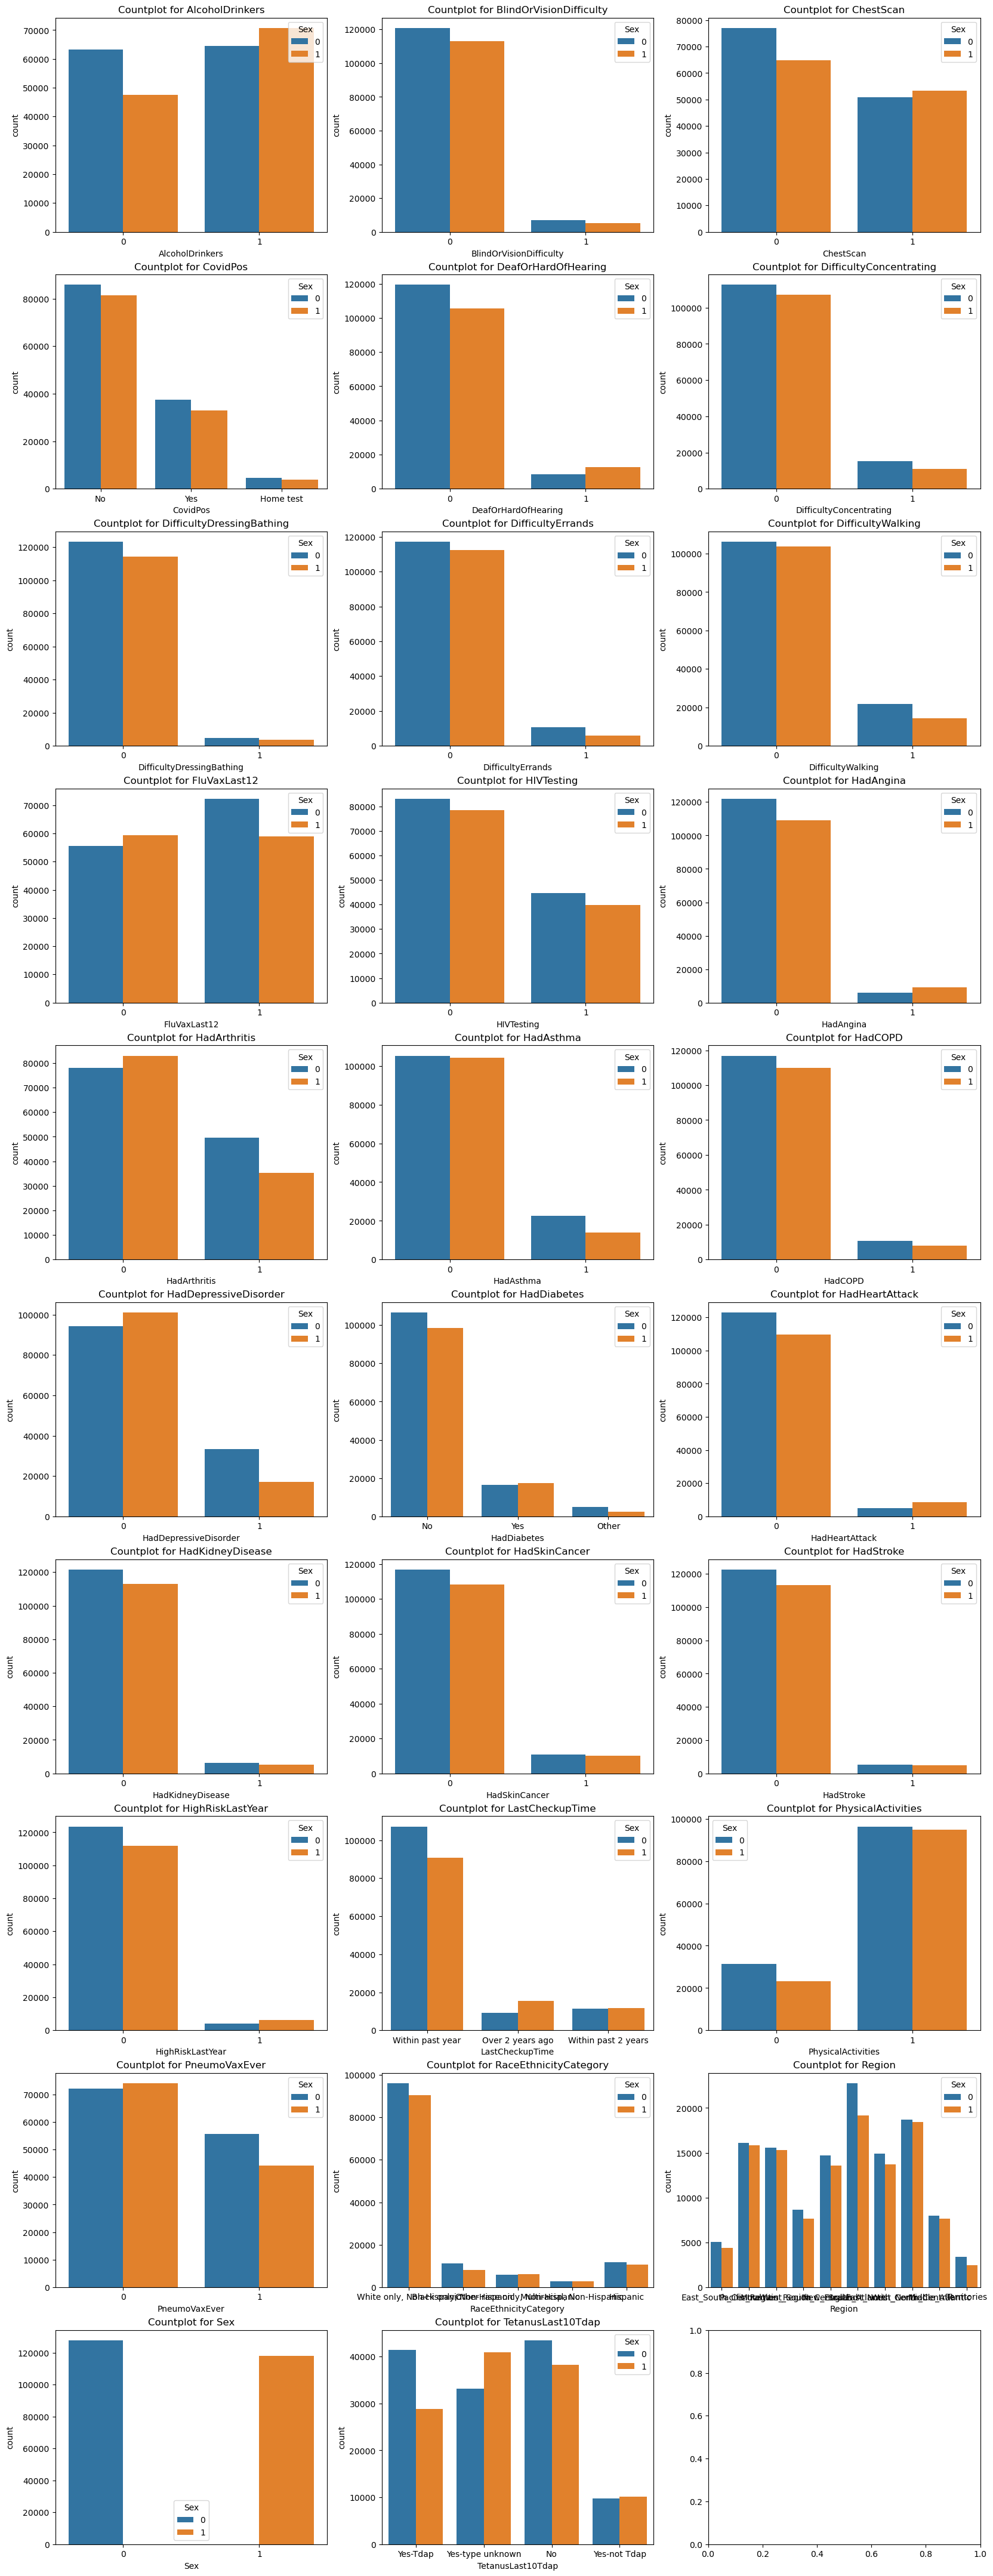

In [7]:
# Create countplots
PLOTS_PER_ROW = 3
figure, axis = plt.subplots(len(cat_cols)//3+1, PLOTS_PER_ROW, sharex=False, figsize=(20,55))

i, j = 0, 0
# create a countplot for all categorical variables using "Sex" as the "hue" parameter
for categorical_var in clean_df[cat_cols]:
  sns.countplot(data=clean_df[cat_cols], hue="Sex", x=categorical_var, ax=axis[i,j])
  axis[i, j].set_title(f"Countplot for {categorical_var}")
  j+=1
  if j%PLOTS_PER_ROW==0:
      i+=1
      j=0

plt.legend([],[], frameon=False)
plt.show()

## Note:

- Looks like all continuous variables besides HeightInMeters could use some normalization. I'm not sure what to do here...tried few transformations like log, square roots, but don't seem to help on top of the MinMaxScale...maybe missing something?
- Was hoping the transformations I tried would help. Considering our data's high dimension, remove outliers is no go. Perhaps quantile based flooring/capping or mean/medium imputation. What do y'all think?
- Multicollinearity: 12 variables with high VIF removed
    - kept BMI instead of WeightInKilograms & HeightInMeters for sake of dimensionality consideration.
    - kept SmokerOrEcig variables instead of other smoke/ecig related variables for now...open to other suggestions.
- Stepwise: I know data is not ideal yet, but went ahead with stepwise to see. Happy to rerun stepwise model stuff after hearing your thoughts/suggestions from above. So far, down-selected to 40 variables after stepwise with both directions, but AIC is quite high at over 71,500.